<a href="https://colab.research.google.com/github/rhanessian/dl-parakeets/blob/main/DLParakeets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! ls -hl

total 4.0K
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data


In [2]:
! rm -rf parakeets

In [3]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [4]:
! ls -hl

total 4.0K
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data


In [5]:
## Load tar files of data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
## Check files have loaded
! ls -hl

total 8.0K
drwx------ 5 root root 4.0K May  4 19:43 gdrive
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data


In [7]:
## Create data stage
! mkdir parakeets

In [8]:
! ls -hl

total 12K
drwx------ 5 root root 4.0K May  4 19:43 gdrive
drwxr-xr-x 2 root root 4.0K May  4 19:44 parakeets
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data


In [9]:
! ls -al parakeets/

total 8
drwxr-xr-x 2 root root 4096 May  4 19:44 .
drwxr-xr-x 1 root root 4096 May  4 19:44 ..


In [10]:
## Extract data from tar files
! tar -zxf gdrive/MyDrive/parakeet_tars/'alexandrine Psittacula eupatria.tar.gz' -C parakeets/ && mv parakeets/'alexandrine Psittacula eupatria' parakeets/alexandrine
! tar -zxf gdrive/MyDrive/parakeet_tars/'bourke Neosephotus bourkii.tar.gz' -C parakeets/ && mv parakeets/'bourke Neosephotus bourkii' parakeets/bourke
! tar -zxf gdrive/MyDrive/parakeet_tars/'budgerigar Melopsittacus undulatus.tar.gz' -C parakeets/ && mv parakeets/'budgerigar Melopsittacus undulatus' parakeets/budgie
! tar -zxf gdrive/MyDrive/parakeet_tars/'derbyan Psittacula derbiana.tar.gz' -C parakeets/ && mv parakeets/'derbyan Psittacula derbiana' parakeets/derbyan
! tar -zxf gdrive/MyDrive/parakeet_tars/'lineolated_barred Bolborhynchus lineola.tar.gz' -C parakeets/ && mv parakeets/'lineolated_barred Bolborhynchus lineola' parakeets/lineolated
! tar -zxf gdrive/MyDrive/parakeet_tars/'monk Myiopsitta monachus.tar.gz' -C parakeets/ && mv parakeets/'monk Myiopsitta monachus' parakeets/monk
! tar -zxf gdrive/MyDrive/parakeet_tars/'moustache_red-breasted Psittacula alexandri.tar.gz' -C parakeets/ && mv parakeets/'moustache_red-breasted Psittacula alexandri' parakeets/moustache
! tar -zxf gdrive/MyDrive/parakeet_tars/'plain Brotogeris tirica.tar.gz' -C parakeets/ && mv parakeets/'plain Brotogeris tirica' parakeets/plain
! tar -zxf gdrive/MyDrive/parakeet_tars/'plum-headed Psittacula cyanocephala.tar.gz' -C parakeets/ && mv parakeets/'plum-headed Psittacula cyanocephala' parakeets/plum
! tar -zxf gdrive/MyDrive/parakeet_tars/'regent Polytelis anthopeplus.tar.gz' -C parakeets/ && mv parakeets/'regent Polytelis anthopeplus' parakeets/regent
! tar -zxf gdrive/MyDrive/parakeet_tars/'ring-necked Psittacula krameri.tar.gz' -C parakeets/ && mv parakeets/'ring-necked Psittacula krameri' parakeets/ring



In [11]:
! ls -al parakeets/

total 140
drwxr-xr-x 13 root root  4096 May  4 19:44 .
drwxr-xr-x  1 root root  4096 May  4 19:44 ..
drwxrwxrwx  2 root root 12288 Apr 16 02:01 alexandrine
drwxrwxrwx  2 root root 12288 Apr 16 01:46 bourke
drwxrwxrwx  2 root root 12288 Apr 16 18:58 budgie
drwxrwxrwx  2 root root 12288 Apr 16 01:15 derbyan
drwxrwxrwx  2 root root 12288 Apr 16 00:53 lineolated
drwxrwxrwx  2 root root 12288 Apr 16 01:15 monk
drwxrwxrwx  2 root root 12288 Apr 16 01:16 moustache
drwxrwxrwx  2 root root 12288 Apr 16 01:17 plain
drwxrwxrwx  2 root root 12288 Apr 16 01:17 plum
drwxrwxrwx  2 root root 12288 Apr 16 01:18 regent
drwxrwxrwx  2 root root 12288 Apr 16 01:29 ring


In [12]:
! ls -hl

total 12K
drwx------  5 root root 4.0K May  4 19:43 gdrive
drwxr-xr-x 13 root root 4.0K May  4 19:44 parakeets
drwxr-xr-x  1 root root 4.0K Apr 21 13:39 sample_data


In [13]:
## Show distribution
! for d in $(ls ./parakeets); do samples=$(ls ./parakeets/${d} | wc -l); echo ${d} ${samples}; done


alexandrine 210
bourke 215
budgie 202
derbyan 206
lineolated 201
monk 204
moustache 204
plain 201
plum 209
regent 201
ring 214


Resize images

In [14]:
import numpy
import os
import PIL
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from os import listdir
from matplotlib import image

In [15]:
# Resize images
data_images = os.path.join('parakeets', '.')
for parapics in os.listdir(data_images):
  directory = os.path.join(data_images, parapics)
  for dat in os.listdir(directory):
    image = Image.open(os.path.join(directory, dat))
    img_p = image.resize((256, 256))
    img_p.save(os.path.join(directory, dat))

In [16]:
! ls -hl parakeets/alexandrine

total 2.7M
-rwxrwxrwx 1 root root 4.2K May  4 19:44 'alexandrine (100).JPG'
-rwxrwxrwx 1 root root  19K May  4 19:44 'alexandrine (101).jpg'
-rwxrwxrwx 1 root root  13K May  4 19:44 'alexandrine (102).JPG'
-rwxrwxrwx 1 root root 9.4K May  4 19:44 'alexandrine (103).JPG'
-rwxrwxrwx 1 root root  17K May  4 19:44 'alexandrine (104).JPG'
-rwxrwxrwx 1 root root  14K May  4 19:44 'alexandrine (105).JPG'
-rwxrwxrwx 1 root root  12K May  4 19:44 'alexandrine (106).jpg'
-rwxrwxrwx 1 root root  12K May  4 19:44 'alexandrine (107).jpg'
-rwxrwxrwx 1 root root 5.4K May  4 19:44 'alexandrine (108).JPG'
-rwxrwxrwx 1 root root  13K May  4 19:44 'alexandrine (109).JPG'
-rwxrwxrwx 1 root root 7.7K May  4 19:44 'alexandrine (10).JPG'
-rwxrwxrwx 1 root root  11K May  4 19:44 'alexandrine (110).jpg'
-rwxrwxrwx 1 root root  17K May  4 19:44 'alexandrine (111).JPG'
-rwxrwxrwx 1 root root 9.0K May  4 19:44 'alexandrine (112).jpg'
-rwxrwxrwx 1 root root 9.0K May  4 19:44 'alexandrine (113).JPG'
-rwxrwxrwx 1 ro

In [17]:
import cv2
import os
import numpy
import os
import PIL
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from os import listdir
from matplotlib import image
sample_images_loaded = list()
for filename in listdir('parakeets/alexandrine'):
  img_data = image.imread('parakeets/alexandrine/' + filename)
  sample_images_loaded.append(img_data)
  print('> loaded %s %s' % (filename, img_data.shape))

> loaded alexandrine (135).JPG (256, 256, 3)
> loaded alexandrine (20).JPG (256, 256, 3)
> loaded alexandrine (34).JPG (256, 256, 3)
> loaded alexandrine (170).jpg (256, 256, 3)
> loaded alexandrine (81).JPG (256, 256, 3)
> loaded alexandrine (137).JPG (256, 256, 3)
> loaded alexandrine (35).JPG (256, 256, 3)
> loaded alexandrine (99).JPG (256, 256, 3)
> loaded alexandrine (3).JPG (256, 256, 3)
> loaded alexandrine (158).jpg (256, 256, 3)
> loaded alexandrine (113).JPG (256, 256, 3)
> loaded alexandrine (116).JPG (256, 256, 3)
> loaded alexandrine (194).JPG (256, 256, 3)
> loaded alexandrine (45).JPG (256, 256, 3)
> loaded alexandrine (147).jpg (256, 256, 3)
> loaded alexandrine (73).JPG (256, 256, 3)
> loaded alexandrine (36).JPG (256, 256, 3)
> loaded alexandrine (101).jpg (256, 256, 3)
> loaded alexandrine (180).JPG (256, 256, 3)
> loaded alexandrine (21).JPG (256, 256, 3)
> loaded alexandrine (168).jpg (256, 256, 3)
> loaded alexandrine (107).jpg (256, 256, 3)
> loaded alexandrine 


Image data generator



In [18]:
from keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [19]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [20]:
image_generator = my_generator.flow_from_directory('./parakeets', target_size=(256, 256), batch_size=11, class_mode='categorical')

Found 2267 images belonging to 11 classes.


This is label key:
['alexandrine', 'bourke', 'budgie', 'derbyan', 'lineolated', 'monk', 'moustache', 'plain', 'plum', 'regent', 'ring']


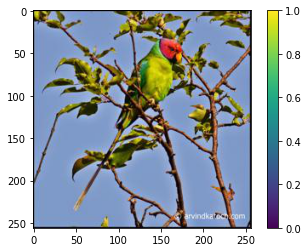

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


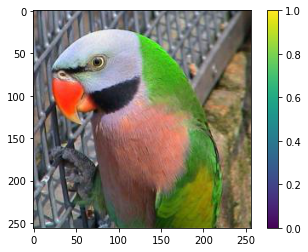

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


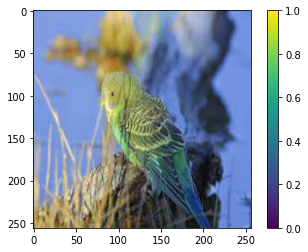

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


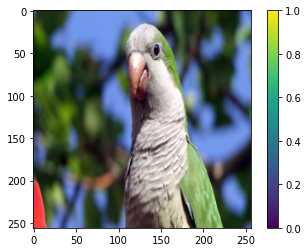

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


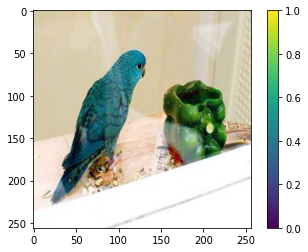

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


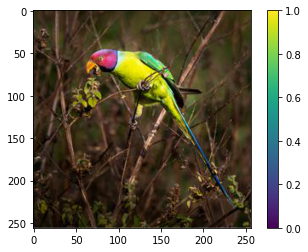

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


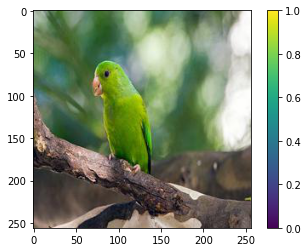

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


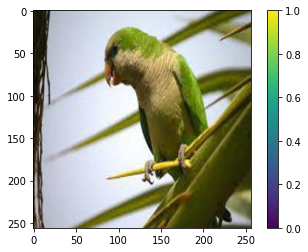

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


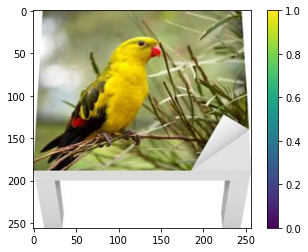

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


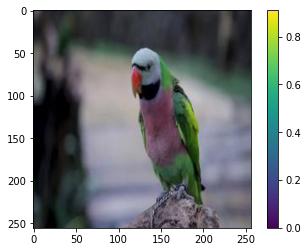

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


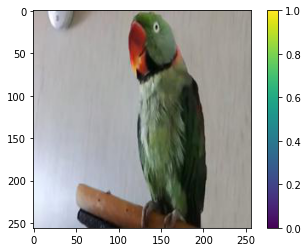

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
## Give one image of each type and label
legend = (sorted(os.listdir('parakeets')))
print("This is label key:")
print(legend)

for my_batch in image_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break   

Augmented data creation

Found 2267 images belonging to 11 classes.


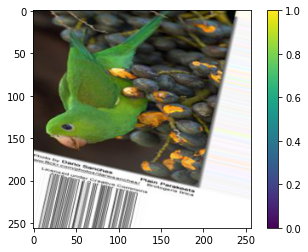

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


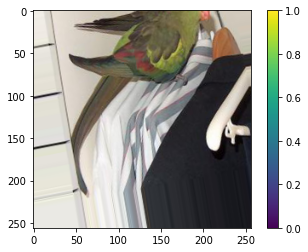

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


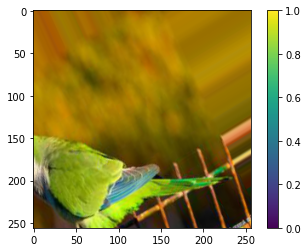

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


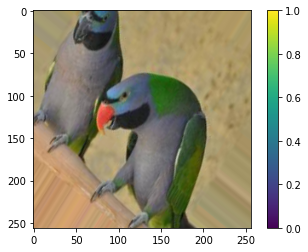

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


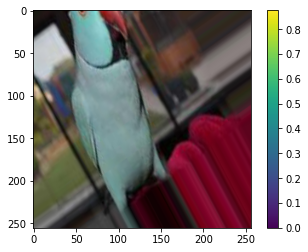

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


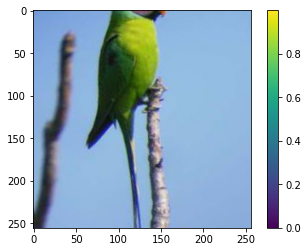

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


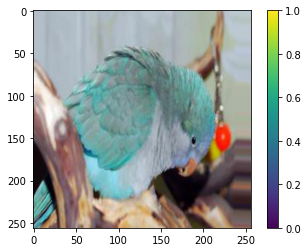

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


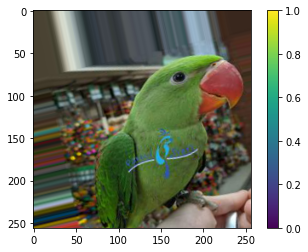

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


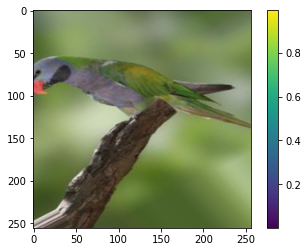

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


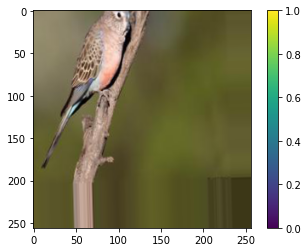

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


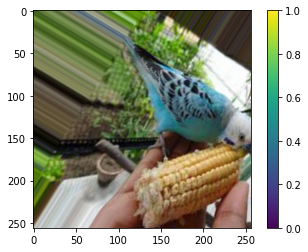

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
my_augmented_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest')

my_augmented_image_generator = my_augmented_generator.flow_from_directory( './parakeets', target_size=(256, 256), batch_size=11, class_mode='categorical')

for my_batch in my_augmented_image_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break



Overfitting models

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( MaxPool2D())
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 123, 123, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
flatten (Flatten)            (None, 468512)            0         
_________________________________________________________________
dense (Dense)                (None, 11)                5

In [24]:
# Compile
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 12)

Epoch 1/12
205/205 [==============================] - 242s 1s/step - loss: 2.5093 - accuracy: 0.0895
Epoch 2/12
205/205 [==============================] - 240s 1s/step - loss: 2.3952 - accuracy: 0.1175
Epoch 3/12
205/205 [==============================] - 242s 1s/step - loss: 2.3979 - accuracy: 0.0882
Epoch 4/12
205/205 [==============================] - 242s 1s/step - loss: 2.1926 - accuracy: 0.2974
Epoch 5/12
205/205 [==============================] - 245s 1s/step - loss: 1.2401 - accuracy: 0.6402
Epoch 6/12
205/205 [==============================] - 242s 1s/step - loss: 0.4108 - accuracy: 0.9052
Epoch 7/12
205/205 [==============================] - 241s 1s/step - loss: 0.1318 - accuracy: 0.9761
Epoch 8/12
205/205 [==============================] - 242s 1s/step - loss: 0.0924 - accuracy: 0.9915
Epoch 9/12
205/205 [==============================] - 241s 1s/step - loss: 0.0635 - accuracy: 0.9906
Epoch 10/12
205/205 [==============================] - 240s 1s/step - loss: 0.0830 - accura

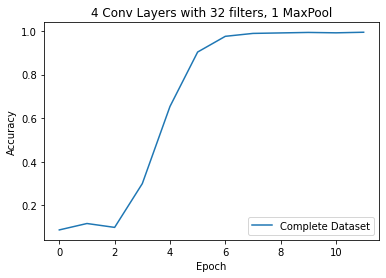

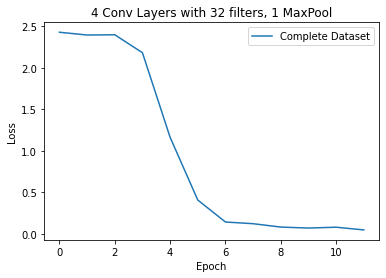

In [25]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '4 Conv Layers with 32 filters, 1 MaxPool'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [26]:
import matplotlib.pyplot as plt

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2032128)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                22353419  
Total params: 22,363,563
Trainable params: 22,363,563
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 14)

Epoch 1/14
205/205 [==============================] - 320s 2s/step - loss: 11.7285 - accuracy: 0.1006
Epoch 2/14
205/205 [==============================] - 318s 2s/step - loss: 2.2599 - accuracy: 0.3224
Epoch 3/14
205/205 [==============================] - 322s 2s/step - loss: 0.7419 - accuracy: 0.8450
Epoch 4/14
205/205 [==============================] - 322s 2s/step - loss: 0.1891 - accuracy: 0.9836
Epoch 5/14
205/205 [==============================] - 322s 2s/step - loss: 0.1618 - accuracy: 0.9913
Epoch 6/14
205/205 [==============================] - 319s 2s/step - loss: 0.0995 - accuracy: 0.9914
Epoch 7/14
205/205 [==============================] - 320s 2s/step - loss: 0.0929 - accuracy: 0.9962
Epoch 8/14
205/205 [==============================] - 321s 2s/step - loss: 0.1335 - accuracy: 0.9863
Epoch 9/14
205/205 [==============================] - 320s 2s/step - loss: 0.0387 - accuracy: 0.9970
Epoch 10/14
205/205 [==============================] - 320s 2s/step - loss: 0.0902 - accur

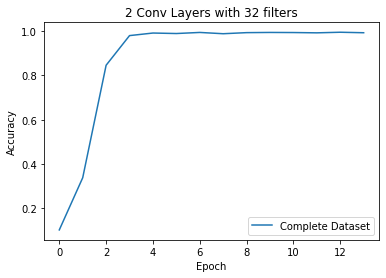

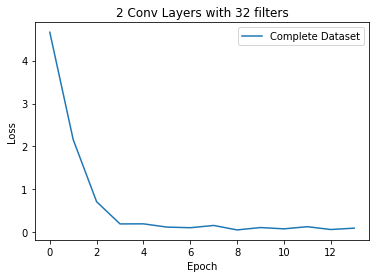

In [29]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '2 Conv Layers with 32 filters'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [30]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

In [31]:
model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2064512)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                22709643  
Total params: 22,710,539
Trainable params: 22,710,539
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 50, epochs = 20)

Epoch 1/20
50/50 [==============================] - 21s 414ms/step - loss: 49.0911 - accuracy: 0.1065
Epoch 2/20
50/50 [==============================] - 21s 410ms/step - loss: 2.4163 - accuracy: 0.2606
Epoch 3/20
50/50 [==============================] - 20s 406ms/step - loss: 2.1324 - accuracy: 0.4181
Epoch 4/20
50/50 [==============================] - 20s 407ms/step - loss: 1.8520 - accuracy: 0.5414
Epoch 5/20
50/50 [==============================] - 20s 406ms/step - loss: 1.4117 - accuracy: 0.6392
Epoch 6/20
50/50 [==============================] - 20s 408ms/step - loss: 1.2451 - accuracy: 0.7154
Epoch 7/20
50/50 [==============================] - 20s 409ms/step - loss: 0.7935 - accuracy: 0.8101
Epoch 8/20
50/50 [==============================] - 20s 404ms/step - loss: 0.6946 - accuracy: 0.8338
Epoch 9/20
50/50 [==============================] - 20s 405ms/step - loss: 0.8075 - accuracy: 0.8345
Epoch 10/20
50/50 [==============================] - 20s 402ms/step - loss: 0.5290 - accur

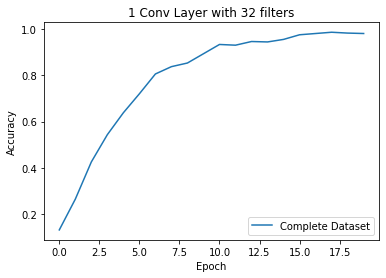

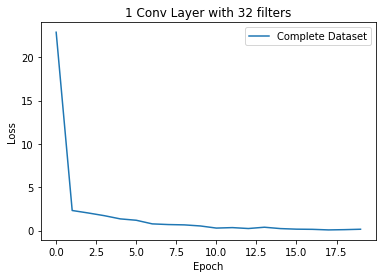

In [33]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '1 Conv Layer with 32 filters'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [34]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 11)

Epoch 1/11
205/205 [==============================] - 83s 405ms/step - loss: 0.1918 - accuracy: 0.9778
Epoch 2/11
205/205 [==============================] - 82s 402ms/step - loss: 0.0426 - accuracy: 0.9926
Epoch 3/11
205/205 [==============================] - 82s 402ms/step - loss: 0.0711 - accuracy: 0.9944
Epoch 4/11
205/205 [==============================] - 82s 399ms/step - loss: 0.0597 - accuracy: 0.9933
Epoch 5/11
205/205 [==============================] - 81s 397ms/step - loss: 0.0267 - accuracy: 0.9975
Epoch 6/11
205/205 [==============================] - 81s 397ms/step - loss: 0.0879 - accuracy: 0.9949
Epoch 7/11
205/205 [==============================] - 81s 396ms/step - loss: 0.0719 - accuracy: 0.9904
Epoch 8/11
205/205 [==============================] - 81s 397ms/step - loss: 0.0774 - accuracy: 0.9903
Epoch 9/11
205/205 [==============================] - 82s 398ms/step - loss: 0.0747 - accuracy: 0.9946
Epoch 10/11
205/205 [==============================] - 82s 399ms/step - l

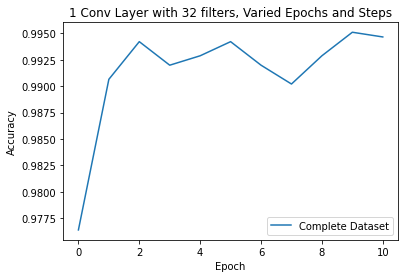

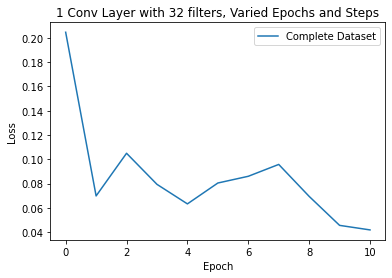

In [35]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '1 Conv Layer with 32 filters, Varied Epochs and Steps'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()